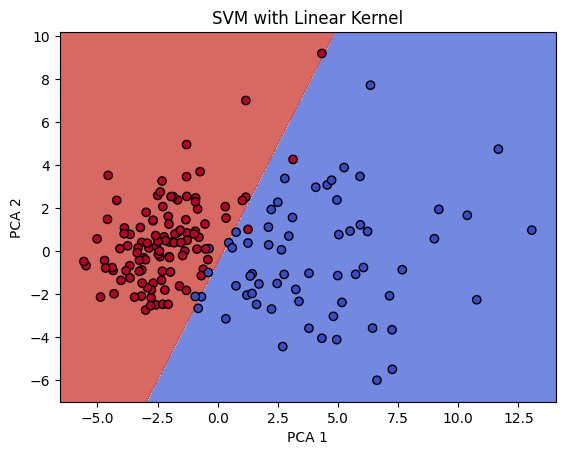

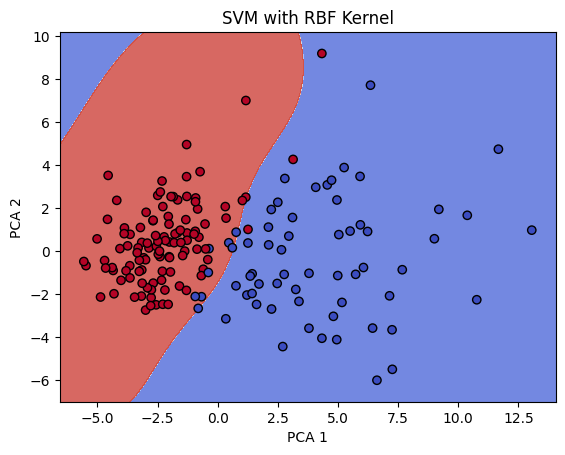

Best Parameters from GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-Validation Accuracy Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean Accuracy: 0.9789318428815401

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.98      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Visualization function
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(title)
    plt.show()

# Plot linear SVM decision boundary
plot_decision_boundary(svm_linear, X_test, y_test, "SVM with Linear Kernel")

# Plot RBF SVM decision boundary
plot_decision_boundary(svm_rbf, X_test, y_test, "SVM with RBF Kernel")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters from GridSearch:", grid.best_params_)

# Cross-validation
scores = cross_val_score(SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel='rbf'),
                         X_scaled, y, cv=5)

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Evaluate best model on original split
best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled)
print("\nClassification Report:\n", classification_report(y, y_pred))
